<a href="https://colab.research.google.com/github/ianbounos/brain-networks/blob/main/C_Elegans_Binary_Undirected_Graph__MotifAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C Elegans - Binary undirected graph - Motif Analysis


In [1]:

from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [3]:
file_path = "/content/drive/My Drive/Grafos y Cerebro/celegans277matrix.csv"
adjacency_matrix = pd.read_csv(file_path, header=None)

# Create undirected graph from adjacency grapha
G = nx.DiGraph(adjacency_matrix.values)
G = G.to_undirected()



"**Motifs** are subgraphs of a network that act as elemental building blocks for its
topology. Motifs can be defined at the level of connected subgraphs of nodes,
or at the level of an ordered sequence of edges comprising a path. Another pop-
ular measure for studying small subsets of nodes is the **clustering coefficient**,
which counts the fraction of a node’s neighbors, which are also connected to
each other."


"The diversity of topological properties that can be computed for all nervous sys
tems, at scales ranging from individual nodes through subgraphs to entire net
works, raises the question: do these properties arise from simpler network wiring
rules? In particular, do certain, recurring connectivity motifs act as basic building
blocks for the emergence of more complex topological properties?"



We can consider that there is a trade-off between seeking proximity among nodes (which implies a shorter path between two given nodes) and reducing the number of edges due to the associated wiring cost. We aim to provide a quantification of this phenomenon.


We define the function *extract_motifs3*, which considers all possible motifs of subgraphs of size three (which, fortunately, are uniquely determined, except for isomorphisms, by the number of edges) and can observe their distribution. This allows us to compare different graphs; for example, we could compare it with one randomly generated.Surely, this function can be improved to run faster.

In [4]:
from itertools import combinations

def extract_motifs3(graph):
    motifs_data = []

    # Step 1: Identify all possible subgraphs of size 3
    for triplet in combinations(graph.nodes(), 3):
        subgraph = graph.subgraph(triplet)
        motif_nodes = tuple(sorted(subgraph.nodes()))
        motif_edges = subgraph.number_of_edges()  # Counting edges in the motif

        motifs_data.append((motif_nodes, motif_edges))

    # Create a DataFrame
    motifs_df = pd.DataFrame(motifs_data, columns=['Triplet', 'Edge_Count'])

    return motifs_df



Let's do it in this example graph:

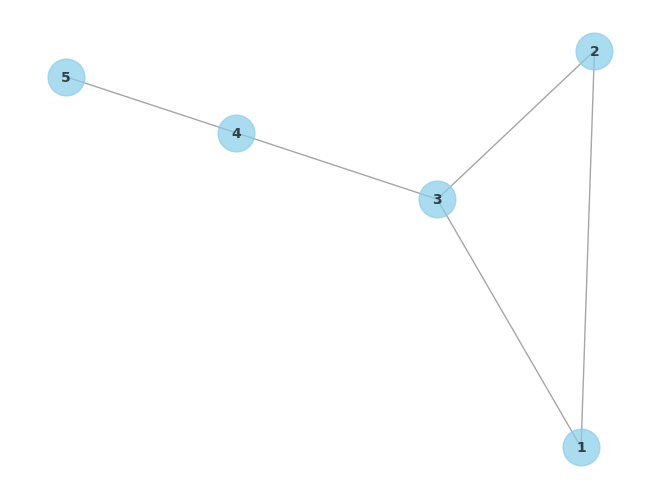

In [5]:
G_example = nx.Graph()
G_example.add_edges_from([(1, 2), (2, 3), (1, 3), (3, 4), (4, 5)])

# Dibujar el grafo
pos = nx.spring_layout(G_example)  # Distribución de los nodos
nx.draw(G_example, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=10, font_color='black', edge_color='gray', linewidths=1, alpha=0.7)

# Mostrar el grafo
plt.show()

In [6]:
extract_motifs3(G_example)

,Triplet,Edge_Count
0,"(1, 2, 3)",3
1,"(1, 2, 4)",1
2,"(1, 2, 5)",1
3,"(1, 3, 4)",2
4,"(1, 3, 5)",1
5,"(1, 4, 5)",1
6,"(2, 3, 4)",2
7,"(2, 3, 5)",1
8,"(2, 4, 5)",1
9,"(3, 4, 5)",2


In [7]:
motifs_size3_graph = extract_motifs3(G)

In [8]:
motifs_size3_graph

,Triplet,Edge_Count
0,"(0, 1, 2)",1
1,"(0, 1, 3)",1
2,"(0, 1, 4)",1
3,"(0, 1, 5)",1
4,"(0, 1, 6)",0
...,...,...
3504045,"(272, 275, 276)",0
3504046,"(273, 274, 275)",0
3504047,"(273, 274, 276)",0
3504048,"(273, 275, 276)",0


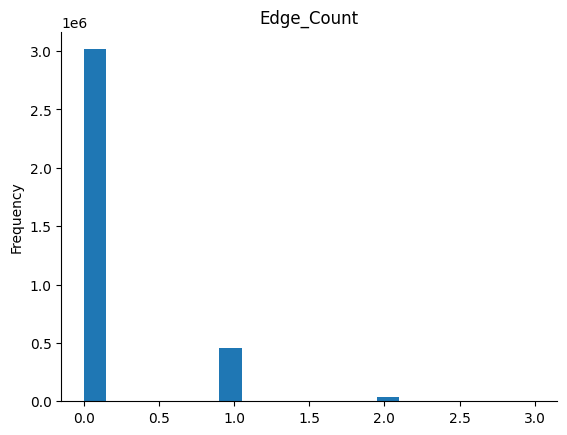

In [9]:

motifs_size3_graph['Edge_Count'].plot(kind='hist', bins=20, title='Edge_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
N_nodes = G.number_of_nodes()
N_edges = G.number_of_edges()


In [11]:

G_random = nx.gnm_random_graph(N_nodes, N_edges)

motifs_size3_graph_random = extract_motifs3(G_random)

In [12]:
motifs_size3_graph_random

,Triplet,Edge_Count
0,"(0, 1, 2)",0
1,"(0, 1, 3)",0
2,"(0, 1, 4)",0
3,"(0, 1, 5)",0
4,"(0, 1, 6)",0
...,...,...
3504045,"(272, 275, 276)",0
3504046,"(273, 274, 275)",0
3504047,"(273, 274, 276)",0
3504048,"(273, 275, 276)",0


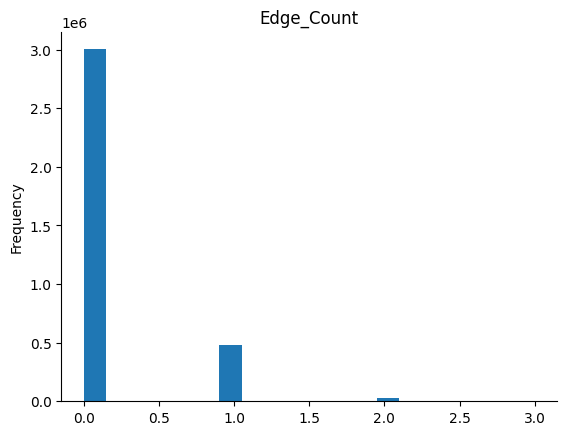

In [13]:

motifs_size3_graph_random['Edge_Count'].plot(kind='hist', bins=20, title='Edge_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

Results are consistent with: "Analysis of three-node motifs suggests that open-triangle structures, in which two
nodes link to a third apical node but are otherwise unconnected, are overrep-
resented in brain networks."

A deeper motif analysis with directed networks (which makes it more complex because there are much more possible subgraphs with three nodes) can be found in

https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0020369